## 에지
- 픽셀 값이 급격하게 바뀌는 부분
    - 어두운 영역에서 갑자기 밝아지거나 어두워지는 부분
    - 객체-배경 간 경계 or 객체-객체 간 경계
    - 에지 검출 : 객체 윤곽 검출
<br><br>

### 에지와 미분
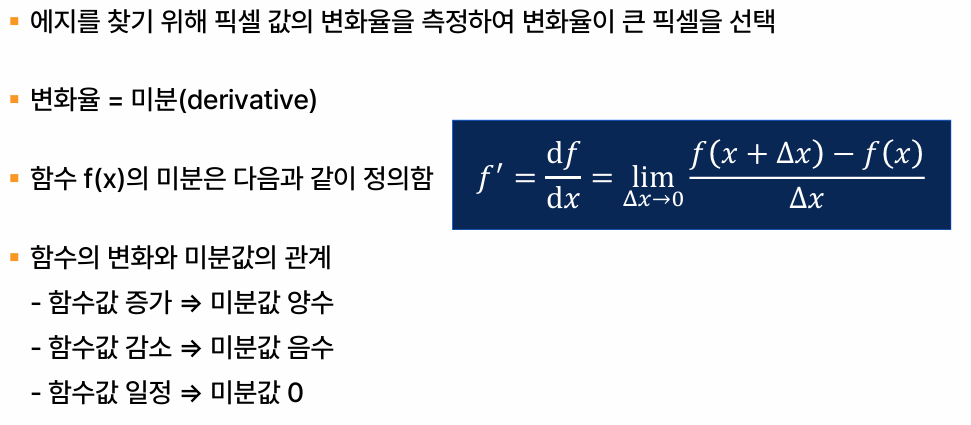
<br><br>

### 미분과 그래디언트
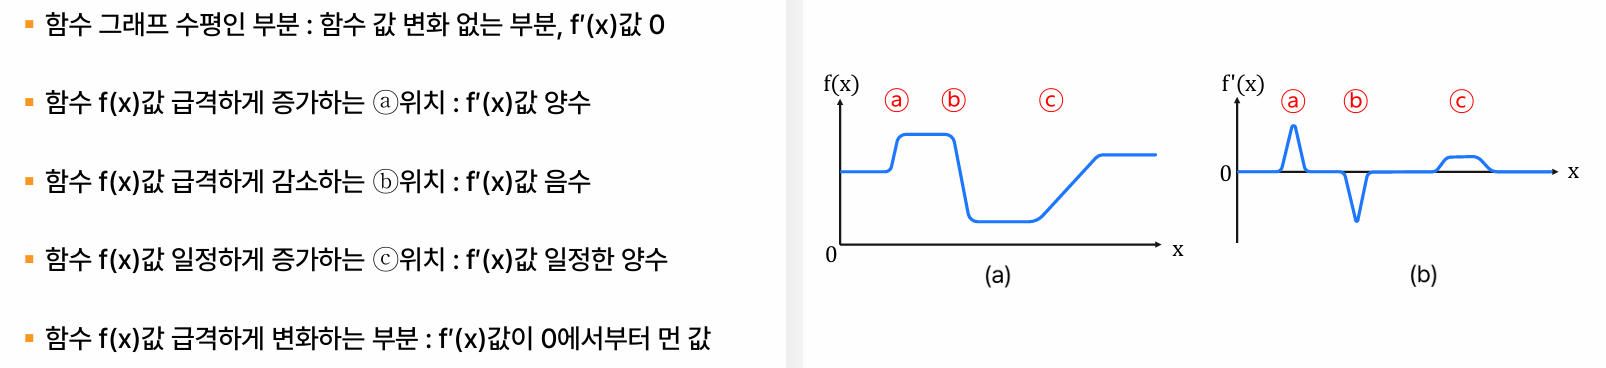
<br><br>

### 마스크 기반 에지 검출
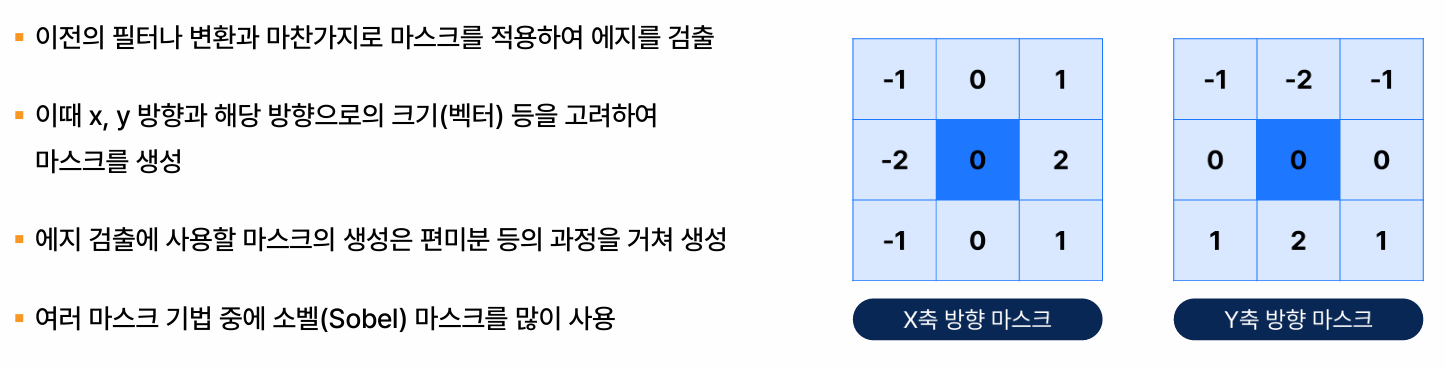
<br><br>

### 소벨 마스크 미분 검출
- cv2.Sobel(src, ddepth, dx, dy, dst = None, ksize = None, scale = None, delta = None, borderType = None)
    - src : 입력 영상
    - ddepth : 출력 영상 데이터 타입
        - -1 입력 : 입력 영상과 같은 데이터 타입 사용
    - dx : x 방향 미분 차수 -> 1차 or 2차 미분 결정
    - dy : y 방향 미분 차수
    - dst : 출력 영상
    - ksize : 커널 크기
    - scale : 연산 결과에 추가적으로 곱할 값(기본값=1)
    - delta : 연산 결과에 추가적으로 더할 값(기본값=0)
    - borderType : 가장자리 픽셀 확장 방식(기본=cv2.BORDER_DEFAULT)


In [3]:
import cv2
import numpy as np

src=cv2.imread('./img/apple.png',cv2.IMREAD_GRAYSCALE)
dx=cv2.Sobel(src,-1,1,0,delta=128)
dy=cv2.Sobel(src,-1,0,1,delta=128)

cv2.imshow('src',src)
cv2.imshow('dx',dx)
cv2.imshow('dy',dy)

cv2.waitKey()
cv2.destroyAllWindows()

# 에지 검출
### 그래디언트를 적용한 에지 검출
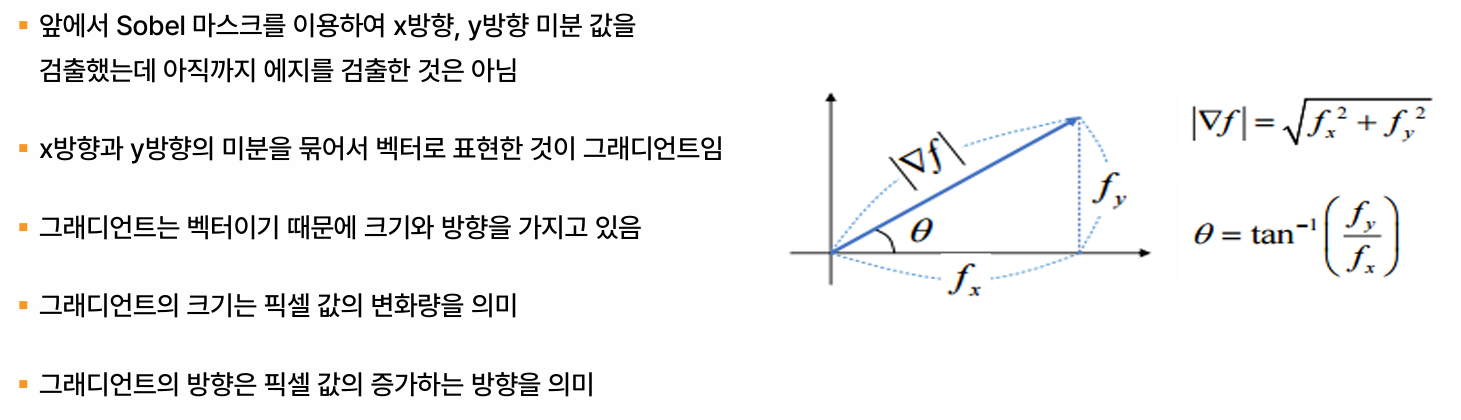
<br><br>

### 2D 벡터 크기 계산 : cv2.magnitude()
- 소벨 필터로 구한 x방향, y방향 미분값 입력하여 벡터 크기 계산
- 소벨 필터 에지 검출 수행
- cv2.magnitude(x, y, magnitude = None)
    - x : 2D 벡터 x 좌표 행렬 (실수형)
    - y : 2D 벡터 y 좌표 행혈 (실수형, x와 같은 크기)
    - magnitude : 2D 벡터 크기 행렬

In [5]:
import cv2
import numpy as np
src = cv2.imread('./img/beach.jpg', cv2.IMREAD_GRAYSCALE)
dx = cv2.Sobel (src, cv2.CV_32F, 1, 0)
dy = cv2.Sobel (src, cv2.CV_32F, 0, 1)

mag = cv2.magnitude(dx, dy)
mag = np.clip(mag, 0, 255).astype(np.uint8)
dst = np.zeros(src.shape[:2], np. uint8)
dst[mag>120] = 255

cv2.imshow('src', src)
cv2.imshow('mag', mag)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

### 캐니 에지 검출
- 소벨 에지 검출 방법 단점 해결
- 좋은 에지 검출기 조건
    1. 정확한 검출 : 에지 검출 못하거나 부정확성 확률 최소화
    2. 정확한 위치 : 실제 에지 중심 찾기
    3. 단일 에지 : 하나의 에지 -> 하나의 점
- 특징
    - 에지 검출전 노이즈 제거 수행
    - 그래디언트 크기,방향 모두 고려
- 캐니 에지 검출 연산 프로세스
    1. 노이즈 제거
    2. 그래디언트 계산
    3. 비최대 억제
    4. 이중 임계값 처리
    5. 에지 연결
- cv2.Canny(img, threshold1, threshold2, edges = None, apertureSize = None, L2gradient = None)
    - img : 입력 영상
    - threshold1 : 하단 임계값
    - threshold2 : 상단 임계값
    - edges : 에지 영상
    - apertureSize : 소벨 연산 위한 커널 크기(기본값=3)
    - L2gradiendt : True - L2 norm 사용 /  False - L1 norm 사용

In [7]:
import cv2

src=cv2.imread('./img/building.png',cv2.IMREAD_GRAYSCALE)
dst=cv2.Canny(src,50,150)

cv2.imshow('src',src)
cv2.imshow('dst',dst)

cv2.waitKey()
cv2.destroyAllWindows()

# Hough 변환
### 허프 변환 직선 검출
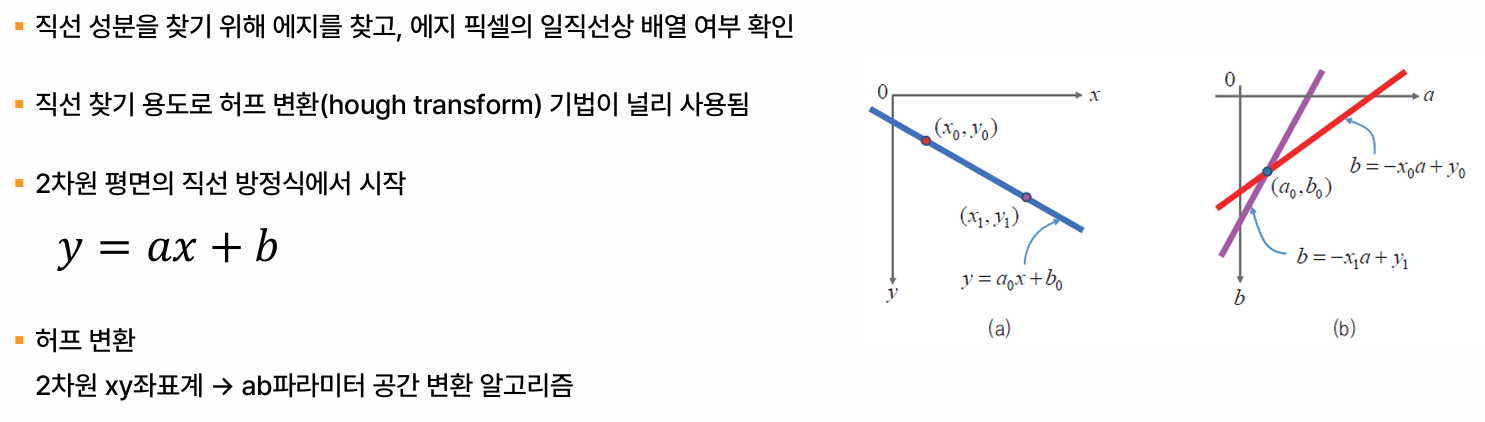
<br><br>

### 허프 변환 직선 검출 - cv2.HoughLines
- 캐니 함수로 윤곽선 검출한 값을 함수에 입력값으로 설정하면 직선 파라미터 정보를 담고있는 결과값 반환
- cv2.HoughLines(img, rho, theta, threshold, lines = None, srn = None, stn = None, min_theta = None, max_theta = None)
    - img : 입력 에지 영상
    - rho : 축적 배열에서 로우값 간격 -> 1.0 : 1픽셀 간격
    - theta : 축적 배열에서 세타값 간격 -> 라디안
    - threshold : 축적 배열에서 직선으로 판단할 임계값
    - lines : 직선 파라미터(rho, theta) 정보 담은 np.ndarray
    - srn, stn : 멀티 스케일 허프 변환에서 로우 해상도, 세타 해상도를 나누는 값(기본값=0 -> 일반 허프 변환 수행)
    - min_theta, max_theta : 검출할 선분의 최소,최대 theta
<br><br>

### 확률적 허프 변환에 의한 선분 검출 - cv2.HoughLinesP
- 직선의 시작과  끝 정보 제공
- cv2.HoughLinesP(img, rho, theta, threshold, lines = None, minLineLength = None, maxLineGap = None)
    - img : 입력 에지 영상
    - rho : 축적 배열에서 로우값 간격 -> 1.0 : 1픽셀 간격
    - theta : 축적 배열에서 세타값 간격 -> 라디안
    - threshold : 축적 배열에서 직선으로 판단할 임계값
    - lines : 선분 시작,끝 좌표(x1, y1, x2, y2) 정보 담은 np.ndarray
    - minLineLength : 검출할 선분의 최소 길이
    - maxLineGap : 직선으로 간주할 최대 에지 점간격

In [ ]:
import cv2
import numpy as np
src= cv2.imread('./img/building.png', cv2.IMREAD_GRAYSCALE)
edge = cv2.Canny(src, 50, 150)
lines = cv2.HoughLinesP(edge, 1, np.pi / 180, threshold=80, minLineLength=50, maxLineGap=10)
dst = cv2.cvtColor(edge, cv2.COLOR_GRAY2BGR)

if lines is not None:
    for i in range(lines.shape[0]):
        pt1 = (lines[i][0][0], lines[i][0][1])
        pt2 = (lines[i][0][2], lines[i][0][3])
        cv2.line(dst, pt1, pt2, (0, 0, 255), 2, cv2.LINE_AA)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

# 원 검출
### 허프 변환 원 검출
- 허프 변환 응용하여 원 검출
<br><br>

### Hough gradient method
- 원에서 검출된 에지의 원주 점의 정보 이용
- 원 에지 픽셀에서 그래디언트 계산하고 그래디언트 크기 방향으로 직선 그리며너서 값 누적
- 그래디언트 크기 : 원 중심으로 모임 -> 원 중심 검출
- cv2.HoughCircles (img, method, dp, minDist, circles=None, param1=None, param2=None, minRadius=None, maxRadius=None)
    - img : 입력 영상(에지 영상 아닌 일반 영상)
    - method : OpenCV 4.2 이하 버전 - cv2.HOUGH_GRADIENT만 지정 가능
    - dp : 입력 영상과 축적 배열 크기 비율
        - 1 : 동일 크기
        - 2 : 축적 배열 가로, 세로 크기 = 입력 영상의 절반
    - minDist : 검출된 원 중심점들의 최소 거리
    - circles : (cx, cy, r) 정보 담은 np.ndarray -> shape : (1, N, 3) / dtype : np.float32
    - param1 : Canny 에지 검출기의 높은 임계값
    - param2 : 축적 배열에서 원 검출 위한 임계값
    - minRadius, maxRadius : 검출할 원의 최소, 최대 반지름


In [20]:
import cv2
import numpy as np

src = cv2.imread('./img/dial.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.medianBlur (src, 5)
cimg = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,
                           cv2.HOUGH_GRADIENT,
                           1,
                           50,
                           param1 = 120,
                           param2 = 50,
                           minRadius = 10,
                           maxRadius = 120)

circles = np. uint16 (np.around (circles))
for i in circles [0,:]:
    cv2.circle(cimg, (i[0], i[1]), i[2], (0, 255, 0), 2)

cv2.imshow('src', src)
cv2.imshow('detected circles', cimg)
cv2.waitKey()
cv2.destroyAllWindows()